In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
packages = pd.read_csv("packages_no_repeats.csv")
packages.head()

,Unnamed: 0,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,click,first_place,winner,punctuation_bool,clicks_ratio
0,0,20/11/2014,17/11/2014,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True,0,0.049148
1,3,20/11/2014,17/11/2014,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False,0,0.025525
2,11,20/11/2014,17/11/2014,546deb3f26714cd2dd00003a,Kim Jong Un Would Really Hate For You To Watch...,545c477e74bfe7589400000b,Things that matter. Pass 'em on.,"<p>At age 21, Yeonmi Park is a brand new activ...",kim-jong-un-would-really-hate-for-you-to-watch...,NaN,NaN,3910,142,False,False,0,0.036317
3,12,20/11/2014,17/11/2014,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0,0.011101
4,18,20/11/2014,17/11/2014,546dfa4226714c0538000064,A Bunch Of Celebrities Recorded A Song To Rais...,546df33b84ad3834f000004c,Things that matter. Pass 'em on.,"<p>In November 2014, singer/songerwriter Bob G...",a-bunch-of-celebrities-recorded-a-song-to-rais...,Powerful quotes from the musician who turned d...,NaN,3848,220,True,True,0,0.057173


In [4]:
packages_array = np.array(packages)

In [27]:
headlines = packages_array[:,4]
print(headlines[100:300])

['You’ll Never Forget The ‘I Have A Dream’ Speech. These Kids Should Go Down In History Too.'
 'Not Every Flash Mob Has The Guts To Do What They Did. Woah.'
 'They Let A Rape Survivor Tell Her Story. But Then They Took 2 Steps Backward.'
 'How To Easily Avoid Every New Parent’s Worst Nightmare'
 "A Football Player Hit His Wife On Video. America Saw It. And Now America's Telling Her What To Do."
 "Meet Some People Who Actually Want You To Go To Prison. You'll Be Shocked At Why. Or Not."
 "It's The 4th Biggest Illegal Industry In The World, And In 11 Years, It Will Destroy Itself"
 "Don't Freak Out At This Map On Infectious Diseases In The World. It's Good Stuff To Know."
 "What Does Trendy Jewelry Have To Do With Her Grandfather's Life's Work? Just You Wait."
 'Any Girl Who Has Skipped School For No Good Reason Definitely Hasn’t Seen These Numbers'
 "She's Been Threatened And Called A Traitor. All For Being A Doctor."
 'Give A Girl A Book And Strange And Wonderful Things Start To Happen

In [28]:
for index in range(packages_array.shape[0]):
    if "?" in str(headlines[index]):
        packages_array[index,-2] = 1
    elif "!" in str(headlines[index]):
        packages_array[index,-2] = 1
    elif "..." in str(headlines[index]):
        packages_array[index,-2] = 1
    elif "-" in str(headlines[index]):
        packages_array[index,-2] = 1
    
    else:
        packages_array[index,-2] = 0

In [29]:
print(packages_array.shape[0])

65363


In [30]:
headlines[2]

'Kim Jong Un Would Really Hate For You To Watch This Which Is Exactly Why You Should'

In [31]:
packages_array[index,-2]

0

In [32]:
print(packages_array[:,-2])

[0 0 0 ... 0 0 0]


In [34]:
packages_df = pd.DataFrame(data=packages_array, columns=["0","created_at", "test_week", "test_id", "headline", "image_id", "excerpt", "lede", "slug", "share_text", "share_image", "impressions", "click", "first_place", "winner", "punctuation_bool", "clicks_ratio"])


In [35]:
packages_df.to_csv("packages_with_punctuation_bool.csv")

In [36]:
#dropping rows with the same headlines

packages_no_repeats = packages_df.drop_duplicates(subset=['headline'], keep='first')

packages_no_repeats.head()

,0,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,click,first_place,winner,punctuation_bool,clicks_ratio
0,0,20/11/2014,17/11/2014,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True,0,0.049148
1,3,20/11/2014,17/11/2014,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False,0,0.025525
2,11,20/11/2014,17/11/2014,546deb3f26714cd2dd00003a,Kim Jong Un Would Really Hate For You To Watch...,545c477e74bfe7589400000b,Things that matter. Pass 'em on.,"<p>At age 21, Yeonmi Park is a brand new activ...",kim-jong-un-would-really-hate-for-you-to-watch...,NaN,NaN,3910,142,False,False,0,0.036317
3,12,20/11/2014,17/11/2014,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0,0.011101
4,18,20/11/2014,17/11/2014,546dfa4226714c0538000064,A Bunch Of Celebrities Recorded A Song To Rais...,546df33b84ad3834f000004c,Things that matter. Pass 'em on.,"<p>In November 2014, singer/songerwriter Bob G...",a-bunch-of-celebrities-recorded-a-song-to-rais...,Powerful quotes from the musician who turned d...,NaN,3848,220,True,True,0,0.057173


In [37]:
packages_no_repeats.to_csv("packages_no_repeats.csv")

In [38]:
x_clicks = packages_array[:,-1]
y_question_bool = packages_array[:,-2]

Text(0.5, 1.0, 'Clicks ratio vs. Punctuation Marks')

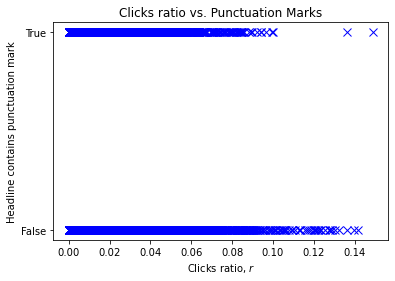

In [86]:
plt.figure()
plt.plot(x_clicks,y_question_bool,'x',markersize='8.0',color="blue")
plt.xlabel("Clicks ratio, $r$")
plt.ylabel("Headline contains punctuation mark")
plt.yticks([1.0, 0.0], ["True","False"])
plt.title("Clicks ratio vs. Punctuation Marks")

In [133]:
contains_punct = []
no_punct = []
# contains_punct[:,1] = np.array([])
# no_punct = np.zeros([47403,2])

for i in range(len(x_clicks)):
    if y_question_bool[i] == 1:
        contains_punct = contains_punct + [x_clicks[i]]
    else:
        no_punct = no_punct + [x_clicks[i]]
        


0.01365834299571757
0.012745123377728283


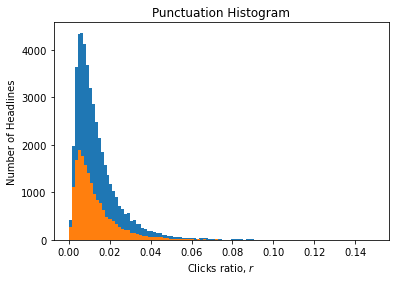

In [175]:
plt.hist(no_punct,bins=100)
plt.hist(contains_punct,bins=100)
plt.title("Punctuation Histogram")
plt.xlabel("Clicks ratio, $r$")
plt.ylabel("Number of Headlines")

print(np.average(no_punct))
print(np.average(contains_punct))

(-0.0015, 0.036)

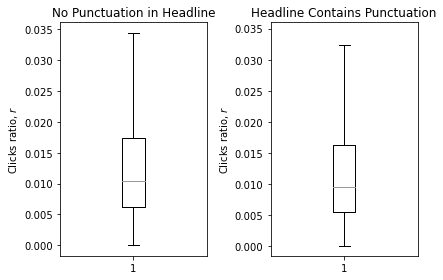

In [174]:
fig, (ax1,ax2) = plt.subplots(1,2, tight_layout=True)
# plt.subplots_adjust(left=1, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax1.set_title('No Punctuation in Headline')
ax2.set_title('Headline Contains Punctuation')

ax1.boxplot(no_punct, showfliers=False)
ax2.boxplot(contains_punct,showfliers=False)
ax1.set_ylabel('Clicks ratio, $r$')
ax2.set_ylabel('Clicks ratio, $r$')
ax2.set_ylim(-0.0015, 0.036)
# ax1.set_xlabel('$x$')

In [40]:
x_clicks, y_question_bool

(array([0.0491481, 0.025524674, 0.036317136, ..., 0.006287227, 0.010836438,
        0.010081916], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0], dtype=object))

In [41]:
# for y in y_question_bool:
#     if y == True:
#         y = 1
#     if y == False:
#         y = 0

In [42]:
# y_question_bool_reverse = np.zeros(y_question_bool.shape[0])

# for i in range(y_question_bool.shape[0]):
#     y_question_bool_reverse[i] = np.abs(y_question_bool[i] - 1)
    
# print(y_question_bool_reverse)
# print(y_question_bool)

# plt.figure()
# plt.plot(x_clicks,y_question_bool_reverse,'.')

In [43]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [44]:
x_clicks_array = np.array(x_clicks)
y_question_bool_array = np.array(y_question_bool)

x_clicks_array.reshape(1, -1)
y_question_bool_array.reshape(1, -1)

x_train, x_test, y_train, y_test = train_test_split(x_clicks_array, y_question_bool_array, random_state=None, shuffle=True)

x_train= x_train.reshape(-1, 1)
# y_train= y_train.reshape(113112, )
x_test = x_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

print(x_train)
print(y_train[0:100])


[[0.005220884]
 [0.016104869]
 [0.007898894]
 ...
 [0.00734355]
 [0.00265252]
 [0.002309469]]
[1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1]


In [45]:
# for y in y_train:
#     if y == True:
#         y = 1
#     else:
#         y = False
        
# for y in y_test:
#     if y == True:
#         y = 1
#     else:
#         y = False


y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [46]:
y_train.shape

(49022,)

In [47]:
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [48]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(x_test)

beta0 = log_reg.coef_
beta1 = log_reg.intercept_

[[-4.50419434]]
[0.0594598]
[[0.030454545]
 [0.002051768]
 [0.011865794]
 ...
 [0.024557602]
 [0.020298736]
 [0.011234316]]


In [49]:
y_pred = log_reg.predict(x_test)

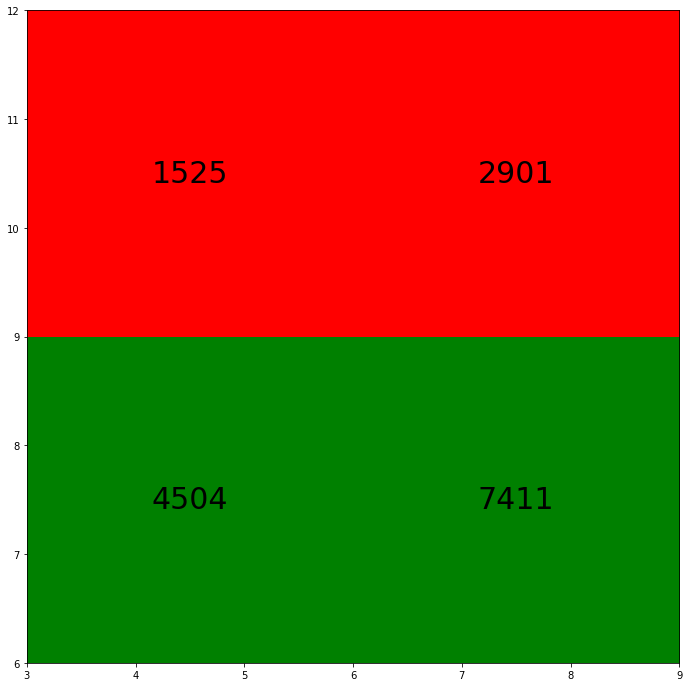

[[4504 7411]
 [1525 2901]]


In [226]:
from matplotlib import colors

C = confusion_matrix(y_test, y_pred)

cmap = colors.ListedColormap(['green','red'],['green','green'])

size = 2
data = np.arange(size * size).reshape((size, size))

# Limits for the extent
x_start = 3.0
x_end = 9.0
y_start = 6.0
y_end = 12.0

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(data, extent=extent, origin='lower', interpolation='None', cmap=cmap)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = C[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, label, color='black', ha='center', va='center', size = '30.0')

# fig.colorbar(im)
plt.show()
print(C)

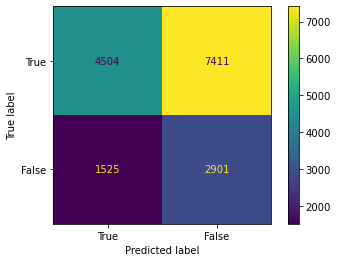

In [236]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(C,display_labels = ["True","False"])
disp.plot()
# disp.display_labels([1.0, 0.0], ["True","False"])
# disp.title("")

In [237]:
print(y_pred[1000:2000])

[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1
 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 0 1 

In [238]:
#Logistic regression for reversed values

In [239]:
# x_clicks_array = np.array(x_clicks)
# y_question_bool_array_reverse = np.array(y_question_bool_reverse)

# x_clicks_array.reshape(1, -1)
# y_question_bool_array.reshape(1, -1)

# x_train, x_test, y_train, y_test = train_test_split(x_clicks_array, y_question_bool_array_reverse, random_state=1)

# x_train= x_train.reshape(-1, 1)
# y_train= y_train.reshape(113112, )
# x_test = x_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)


In [240]:
# x_train=x_train.astype('float')
# y_train=y_train.astype('int')
# x_test=x_test.astype('float')
# y_test=y_test.astype('int')

In [241]:
# log_reg = LogisticRegression()
# log_reg.fit(x_train, y_train)

In [242]:
# print(log_reg.coef_)
# print(log_reg.intercept_)

# beta0 = log_reg.coef_
# beta1 = log_reg.intercept_

In [243]:
# y_pred = log_reg.predict(x_test)

In [244]:
# confusion_matrix(y_test, y_pred)

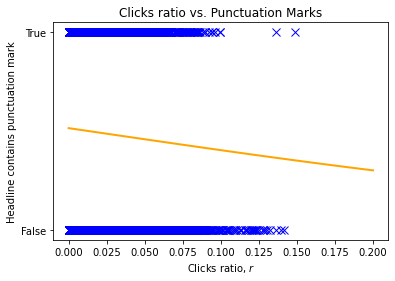

In [245]:
plt.figure()
plt.plot(x_clicks,y_question_bool,'x',markersize='8.0',color="blue")
plt.xlabel("Clicks ratio, $r$")
plt.ylabel("Headline contains punctuation mark")
plt.yticks([1.0, 0.0], ["True","False"])
plt.title("Clicks ratio vs. Punctuation Marks")

x_curve = np.linspace(0,0.2,100)
y_curve = np.zeros(100)

for i in range(100):
    y_curve[i] = (1/(1+(np.exp(-(beta0*x_curve[i]+beta1)))))
    
plt.plot(x_curve,y_curve,color='orange',linewidth='2.0')

In [246]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.45315464169879444
Precision: 0.28132273079906905
Recall: 0.6554450971531858


In [247]:
count_1s = 0
for i in y_question_bool:
    if i==1:
        count_1s = count_1s +1
        
print(count_1s)
print(y_question_bool.shape)

17960
(65363,)
